<a href="https://colab.research.google.com/github/cafechungkhoan/lyd-report/blob/main/DXS_10022021_comment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LYD - Comment Sentiment Analysis**

*LYD l√† h·ªá th·ªëng √°p d·ª•ng Deep Learning d√πng ƒë·ªÉ qu√©t, t√≥m t·∫Øt, ph√¢n t√≠ch v√† d·ª± b√°o c·∫£m x√∫c c·ªßa nh√† ƒë·∫ßu t∆∞. V·ªõi m·ª•c ƒë√≠ch h·ªó tr·ª£ nghi·ªáp v·ª• t∆∞ v·∫•n IR (Investor Relation)*

**D·ªØ li·ªáu input**: 
l√† d·ªØ li·ªáu b√¨nh lu·∫≠n (text) c·ªßa nh√† ƒë·∫ßu t∆∞ tr√™n m·∫°ng x√£ h·ªôi v√† c√°c di·ªÖn ƒë√†n ch·ª©ng kho√°n l·ªõn. Quy m√¥ tracking 700k user

**C√°c Model √°p d·ª•ng**: 
Bert, transformer, SVM, PhoBERT 

### **LYD tr·∫£ l·ªùi c√°c c√¢u h·ªèi ch√≠nh**:
* **M√£ c·ªï phi·∫øu c·ªßa doanh nghi·ªáp c√≥ ƒë∆∞·ª£c nh√† ƒë·∫ßu t∆∞ y√™u th√≠ch kh√¥ng?** (√Åp d·ª•ng Text Classification Model x√°c ƒë·ªãnh tr·∫°ng th√°i c·∫£m x√∫c c·ªßa nh√† ƒë·∫ßu t∆∞ hi·ªán t·∫°i l√† t√≠ch c·ª±c (h√†i l√≤ng) hay ti√™u c·ª±c (kh√¥ng h√†i l√≤ng) v·ªÅ c·ªï phi·∫øu YYY ƒë∆∞·ª£c x√°c ƒë·ªãnh tr∆∞·ªõc.)
* **Nh√† ƒë·∫ßu t∆∞ ƒëang b√†n t√°n g√¨ v·ªÅ c·ªï phi·∫øu doanh nghi·ªáp?** (√Åp d·ª•ng Topic Cluster Model ph√¢n lo·∫°i c√°c ch·ªß ƒë·ªÅ ch√≠nh c∆° b·∫£n / kƒ© thu·∫≠t / th·ªùi s·ª± & vƒ© m√¥ / tin ƒë·ªìn) c·ªßa c·ªï phi·∫øu YYY ƒë∆∞·ª£c x√°c ƒë·ªãnh tr∆∞·ªõc.)
* **ƒê√¢u l√† ch·ªß ƒë·ªÅ nh√† ƒë·∫ßu t∆∞ th√≠ch nh·∫•t v·ªÅ c·ªï phi·∫øu?** (√Åp d·ª•ng BERT Text Summarize ƒë·ªÉ t√≥m t·∫Øt n·ªôi dung comment)

---

In [ ]:
#@title Input Parameter
a = input('Nh·∫≠p m√£ c·∫ßn search: ')
b= input('Nh·∫≠p gi·ªõi h·∫°n comment: ')

Nh·∫≠p m√£ c·∫ßn search: dxs
Nh·∫≠p gi·ªõi h·∫°n comment: 1000


## **Ph√¢n t√≠ch ng∆∞·ªùi tham gia b√¨nh lu·∫≠n**

√ù nghƒ©a c·ªßa bi·ªÉu ƒë·ªì: Bi·ªÉu di·ªÖn b·∫±ng chart violin, quan s√°t m·∫≠t ƒë·ªô ph√¢n ph·ªëi s·ªë l∆∞·ª£ng b√¨nh lu·∫≠n c·ªßa c√°c user
*   X√°c ƒë·ªãnh c√≥ v·∫•n ƒë·ªÅ seeding b√¨nh lu·∫≠n ·∫£o kh√¥ng
*   X√°c ƒë·ªãnh nh√≥m ng∆∞·ªùi theo sentiment



S·ªë b√¨nh lu·∫≠n =  303 . S·ªë ng∆∞·ªùi tham gia b√¨nh lu·∫≠n =  200 . Median comment / user =  1.0


Text(0.5, 1.0, 'ViolinPlot s·ªë l∆∞·ª£ng comment c·ªßa ng∆∞·ªùi tham gia b√¨nh lu·∫≠n')

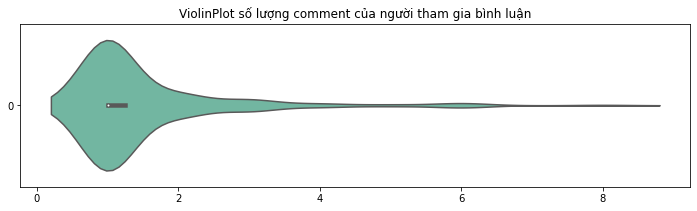

In [ ]:
#@title    

import matplotlib.pyplot as plt
import seaborn as sns
so_nguoi = data.groupby('user.name').count().reset_index()
print('S·ªë b√¨nh lu·∫≠n = ',len(data),'. S·ªë ng∆∞·ªùi tham gia b√¨nh lu·∫≠n = ', len(so_nguoi),'. Median comment / user = ', so_nguoi['originalContent'].median())
plt.figure(figsize = (12,3))
sns.violinplot(data=so_nguoi['originalContent'], orient="h", palette="Set2").set_title('ViolinPlot s·ªë l∆∞·ª£ng comment c·ªßa ng∆∞·ªùi tham gia b√¨nh lu·∫≠n')

# **Visualize Sentiment Analysis**

√ù nghƒ©a c·ªßa bi·ªÉu ƒë·ªì: Bi·ªÉu di·ªÖn s·ªë l∆∞·ª£ng b√¨nh lu·∫≠n t√≠ch c·ª±c / ti√™u c·ª±c / trung t√≠nh theo khung th·ªùi gian.
* Positive Comment: B√¨nh lu·∫≠n ƒë∆∞·ª£c m√°y nh·∫≠n di·ªán l√† t√≠ch c·ª±c
* Negative Comment: B√¨nh lu·∫≠n ƒë∆∞·ª£c m√°y nh·∫≠n di·ªán l√† ti√™u c·ª±c
* Neutral Comment: B√¨nh lu·∫≠n ƒë∆∞·ª£c m√°y nh·∫≠n di·ªán l√† kh√¥ng c√≥ tr·∫°ng th√°i c·∫£m x√∫c (ho·∫∑c m√°y kh√¥ng nh·∫≠n di·ªán ƒë∆∞·ª£c)

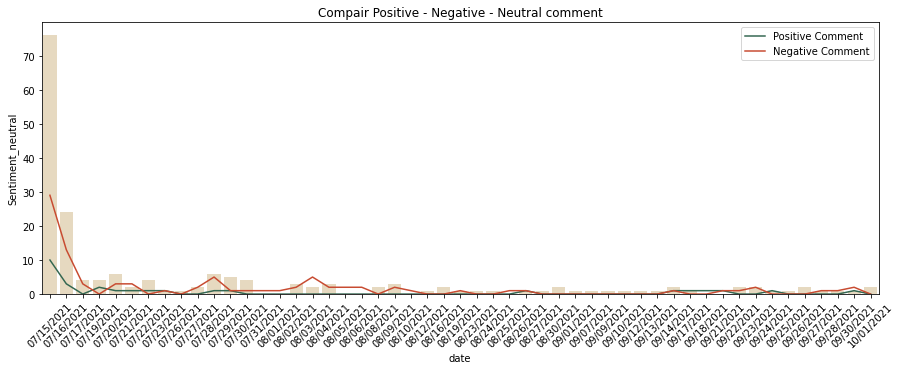

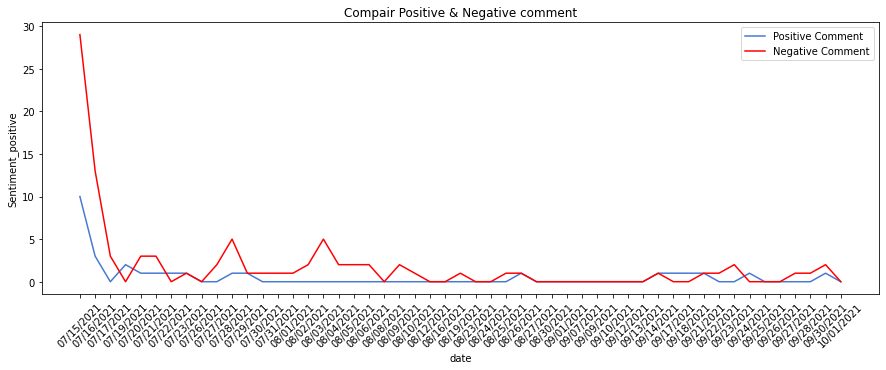

# **Visualize Topic Cluster**

√ù nghƒ©a bi·ªÉu ƒë·ªì: Ph√¢n lo·∫°i comment theo 4 nh√≥m: C∆° b·∫£n / Kƒ© thu·∫≠t / Vƒ© m√¥ / Tin ƒë·ªìn. V√† nh·∫≠n di·ªán c·∫£m x√∫c (t√≠ch c·ª±c / ti√™u c·ª±c) tr√™n t·ª´ng lo·∫°i topic

Text(0.5, 1.0, 'Topic Tin ƒë·ªìn')

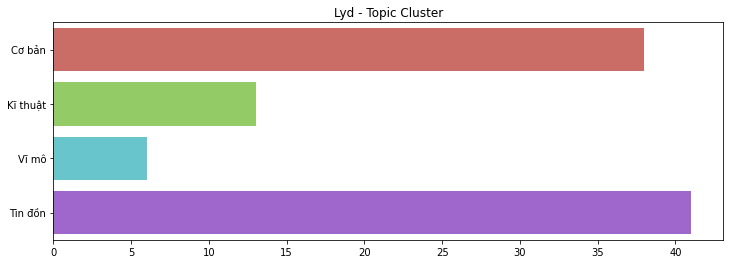

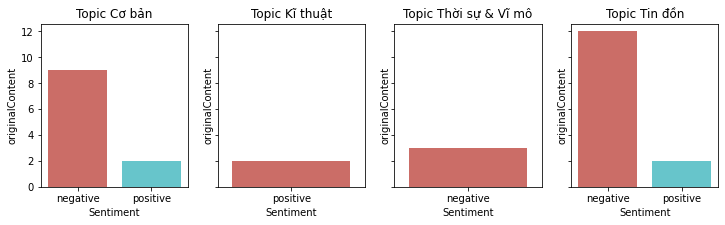

S·ªë comment c∆° b·∫£n =  38 . S·ªë ng∆∞·ªùi tham gia comment =  34
S·ªë comment kƒ© thu·∫≠t =  13 . S·ªë ng∆∞·ªùi tham gia comment =  10
S·ªë comment th·ªùi s·ª± & vƒ© m√¥ =  6 . S·ªë ng∆∞·ªùi tham gia comment =  6
S·ªë comment tin ƒë·ªìn =  41 . S·ªë ng∆∞·ªùi tham gia comment =  39


## **Text Summarization (tin ƒë·ªìn) using BERT**

In [ ]:
tin_don_show = tin_don.drop(['Content_Processed','Sentiment','Content_Tokenize'], axis = 1)
tin_don_show

index  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Text_Summarize
0   0      ...  ƒê√©o bi·∫øt khi n√†o m·ªõi cho nh√† ƒë·∫ßu t∆∞ v·ªÅ b·ªù, 6 th√°ng tin t∆∞·ªüng l√£nh ƒë·∫°o, tin t∆∞·ªüng cty m√† cho h·ªç m·∫•t nh√† th√¨ ƒë√©o bao gi·ªù c√≥ l·∫ßn th·ª© 2\nXin g·ª≠i ƒë·∫øn ban l√£nh ƒë·∫°o cty DXS                                                                                                                                                                                                                                                                                                                                                                                                                                        
1   34     ...  Con h√†ng nh·ªç nh·∫•t h·ªá m·∫∑t tr·ªùi.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
2   38     ...  ùó°ùóµùóÆÃ£ÃÇùóª ƒëùó∂Ã£ùóªùóµ ùòÅùóµùó∂Ã£ ùòÅùóøùòÇÃõùóºÃõÃÄùóªùó¥ ùüØùü¨/ùü¨ùü¥:\n- Vnindex ƒë√≥ng c·ª≠a tƒÉng +12.08 ƒëi·ªÉm (+0.93%) l√™n 1313.02 ƒëi·ªÉm. - Giao d·ªãch kh·ªëi ngo·∫°i b√°n r√≤ng -384.84 t·ª∑ t·∫≠p trung ch·ªß y·∫øu VJC,PNJ,HPG. - T·ª± doanh b√°n r√≤ng ch·ªß y·∫øu c√°c m√£ CTG,MBB,VPB.                                                                                                                                                                                                                                                                                                                                                                                 
3   39     ...  üìàùó°ùóµùóÆÃ£ÃÇùóª ƒëùó∂Ã£ùóªùóµ ùòÅùóµùó∂Ã£ ùòÅùóøùòÇÃõùóºÃõÃÄùóªùó¥ ùüÆùü≥/ùü¨ùü¥:üìà\n- Vnindex ƒë√≥ng c·ª≠a gi·∫£m -8.43 ƒëi·ªÉm (-0.64%) v·ªÅ 1301.12 ƒëi·ªÉm. - V·ªÅ d√≤ng ti·ªÅn tuy c√≥ √°p l·ª±c b√°n t·ª´ VN30 v√† Bank nh∆∞ng d√≤ng ti·ªÅn c≈©ng d·ªãch chuy·ªÉn sang c√°c nh√≥m ng√†nh kh√°c nh∆∞ C·∫£ng, d·ªát may, ƒë·∫°m, nƒÉng l∆∞·ª£ng ... ch·ª© kh√¥ng c√≥ d·∫•u hi·ªáu r√∫t ra kh·ªèi th·ªã tr∆∞·ªùng.                                                                                                                                                                                                                                                                                                           
4   41     ...  Chuy·ªÉn s√†n sang Hose c√≥ g√¨ ∆∞u ƒëi·ªÉm h∆°n kh√¥ng c√°c b√°c?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
5   47     ...  Nh·ªØng sp tg Th√¨n r√¢u ƒë·

# **Chi ti·∫øt 1000 comment g·∫ßn nh·∫•t**

In [ ]:
data2 = data
data2 = data.drop(['Content_Processed','Sentiment','Content_Tokenize','topic_cluster'] , axis = 1)
data2

originalContent  ...                      user.name
0    ƒê√©o bi·∫øt khi n√†o m·ªõi cho nh√† ƒë·∫ßu t∆∞ v·ªÅ b·ªù, 6 th√°ng tin t∆∞·ªüng l√£nh ƒë·∫°o, tin t∆∞·ªüng cty m√† cho h·ªç m·∫•t nh√† th√¨ ƒë√©o bao gi·ªù c√≥ l·∫ßn th·ª© 2\nXin g·ª≠i ƒë·∫øn ban l√£nh ƒë·∫°o cty DXS                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    ...  Anh l√°i ƒë√≤                   
1    ƒê·ªÅu th·∫ø DXS                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               